# Mask R-CNN Demo

Please run through the next few cells and use the function compute_contours

In [ ]:
import random
import math
import numpy as np
import scipy.misc
import matplotlib
import matplotlib.pyplot as plt
import cv2

import coco
import model as modellib

%matplotlib inline 

# Root directory of the project
ROOT_DIR = os.getcwd()

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Path to trained weights file
# Download this file and place in the root of your 
# project (See README file for details)
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

## Configurations

We'll be using a model trained on the MS-COCO dataset. The configurations of this model are in the ```CocoConfig``` class in ```coco.py```.

For inferencing, modify the configurations a bit to fit the task. To do so, sub-class the ```CocoConfig``` class and override the attributes you need to change.

In [2]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.print()


Configurations:
BACKBONE_SHAPES                [[256 256]
 [128 128]
 [ 64  64]
 [ 32  32]
 [ 16  16]]
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [ 0.1  0.1  0.2  0.2]
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
GPU_COUNT                      1
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_MIN_DIM                  800
IMAGE_PADDING                  True
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.002
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTANCES               100
MEAN_PIXEL                     [ 123.7  116.8  103.9]
MINI_MASK_SHAPE                (56, 56)
NAME                           coco
NUM_CLASSES                    81
POOL_SIZE                      7
POST_NMS_ROIS_INFERENCE        1000
POST_NMS_ROIS_TRAINI

## Create Model and Load Trained Weights

In [3]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)

## Detecting Masks and producing contours

In [62]:
# Run detection
def compute_contours(im, contour_width=5):
    results = model.detect([im], verbose=0) #run object detector
    r = results[0]
    kernel = np.ones((contour_width,contour_width),np.uint8) #kernel for morphological gradient
    contours = np.array([cv2.morphologyEx(img , cv2.MORPH_GRADIENT, kernel) for img in r['masks'].transpose(2,0,1)]).sum(axis=0)> 0 #morphological gradient
    return contours*1.0 #cast to float and return

def make_pretty_frame(im, alpha=0.6): #sorry for the function name. I was very sleepy when I wrote this
    contours = compute_contours(im)
    return alpha*im/im.max() + (1-alpha)*np.dstack([contours]*3)

In [68]:
#example
image = scipy.misc.imread("images/3627527276_6fe8cd9bfe_z.jpg")

CPU times: user 78.2 ms, sys: 0 ns, total: 78.2 ms
Wall time: 65.3 ms


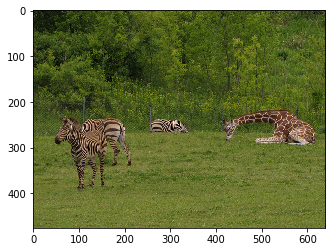

In [69]:
%%time
plt.imshow(image)

CPU times: user 346 ms, sys: 76.8 ms, total: 423 ms
Wall time: 1.11 s


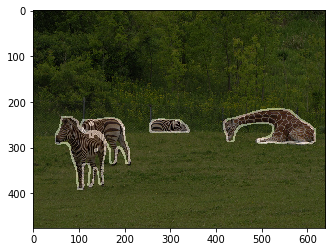

In [70]:
%%time
plt.imshow(make_pretty_frame(image))